In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/practice/data/london.csv')
data.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [3]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
data.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [6]:
london = data.convert_dtypes()
london[['is_holiday', 'is_weekend']] = london[['is_holiday', 'is_weekend']].astype(dtype='bool')
london['timestamp'] = pd.to_datetime(london['timestamp'])
london.dtypes

timestamp       datetime64[ns]
cnt                      Int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code             Int64
is_holiday                bool
is_weekend                bool
season                   Int64
dtype: object

In [7]:
london = london.sort_values(by='timestamp').set_index('timestamp')
london.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,False,True,3
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,False,True,3
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,False,True,3
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,False,True,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,False,True,3


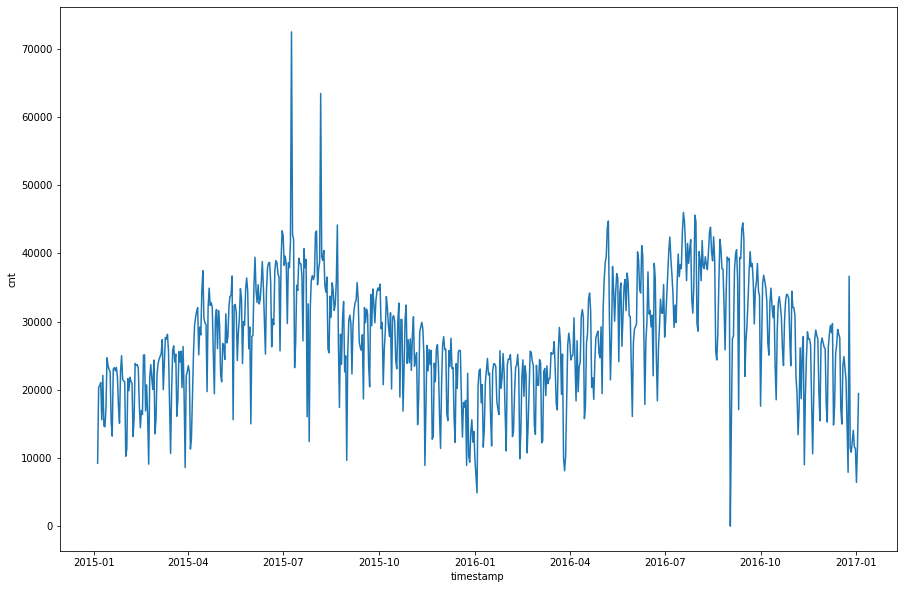

In [8]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=london.resample(rule='D').sum(), x='timestamp', y='cnt')

In [13]:
london_rolling_mean = london.resample(rule='D').sum().rolling(3).cnt.mean().to_frame()
london_rolling_mean.loc['2015-07-09']

cnt    50705.0
Name: 2015-07-09 00:00:00, dtype: float64

In [14]:
london_rolling_mean.head()

,cnt
timestamp,
2015-01-04,NaN
2015-01-05,NaN
2015-01-06,16739.666667
2015-01-07,20683.000000
2015-01-08,19092.666667


In [27]:
std = np.std(
    london.resample(rule='D').cnt.sum() - \
    london.resample(rule='D').sum().rolling(3).cnt.mean()
    )
std.round(2)

4558.59

In [30]:
london_rolling_mean.rename(columns={'cnt': 'rolling_mean'}, inplace=True)

In [33]:
london_rolling_mean['cnt'] = london.resample(rule='D').cnt.sum()
london_rolling_mean['upper_bound'] = london_rolling_mean.rolling_mean + 2.576 * std
london_rolling_mean['lower_bound'] = london_rolling_mean.rolling_mean - 2.576 * std
london_rolling_mean

,rolling_mean,upper_bound,lower_bound,cnt
timestamp,,,,
2015-01-04,NaN,NaN,NaN,9234
2015-01-05,NaN,NaN,NaN,20372
2015-01-06,16739.666667,28482.585854,4996.747479,20613
2015-01-07,20683.000000,32425.919188,8940.080812,21064
2015-01-08,19092.666667,30835.585854,7349.747479,15601
...,...,...,...,...
2016-12-30,12682.000000,24424.919188,939.080812,11566
2016-12-31,12347.333333,24090.252521,604.414146,11424
2017-01-01,9803.666667,21546.585854,-1939.252521,6421


In [41]:
london_rolling_mean[london_rolling_mean.cnt > london_rolling_mean.upper_bound]

,rolling_mean,upper_bound,lower_bound,cnt
timestamp,,,,
2015-07-09,50705.000000,62447.919188,38962.080812,72504
2015-08-06,46627.333333,58370.252521,34884.414146,63468
2016-09-04,14259.000000,26001.919188,2516.080812,27512
2016-12-25,19650.666667,31393.585854,7907.747479,36653


In [42]:
london_rolling_mean[london_rolling_mean.cnt < london_rolling_mean.lower_bound]

,rolling_mean,upper_bound,lower_bound,cnt
timestamp,,,,
2015-05-14,28709.333333,40452.252521,16966.414146,15609
2015-07-12,36036.666667,47779.585854,24293.747479,23240
2015-07-24,31013.666667,42756.585854,19270.747479,16034
2015-08-24,29529.333333,41272.252521,17786.414146,17400
2015-11-14,21037.333333,32780.252521,9294.414146,8898
2016-09-02,26086.333333,37829.252521,14343.414146,0
2016-09-10,31262.000000,43004.919188,19519.080812,17080
2016-09-16,36193.333333,47936.252521,24450.414146,21967
2016-11-12,20878.000000,32620.919188,9135.080812,8990
